# **Dataset Description**

The dataset consists of paired audio and lyrics files, where each audio track corresponds
to a single lyrics file in a sequentially aligned manner. Audio files are stored in MP3
format, while lyrics are provided as raw text files. The dataset is designed for multimodal
analysis, enabling joint exploration of musical and textual representations.


In [1]:
# Basic imports
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Add project src to path if needed
import sys
sys.path.append(os.path.abspath('../src'))

In [3]:
# Dataset Description: Genre Dataset
import pandas as pd

# 1. Load the CSV
csv_file = r"E:\CSE425_Project\project\data\genre\song_quadrant_genre.csv"
df = pd.read_csv(csv_file)

print("Dataset loaded successfully.\n")

# 2. Inspect the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# 3. Basic information
print("\nDataset Info:")
df.info()

# 4. Check for null values
print("\nNull value check:")
print(df.isnull().sum())

# 5. Check unique values for each column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 6. Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Dataset loaded successfully.

First 5 rows of the dataset:


,Song,Quadrant,Title,Genres
0,L001-141,Q4,Moon Song,NaN
1,L002-157,Q3,Mother,"Singer/Songwriter,Rock & Roll,Album Rock,Pop/Rock"
2,L004-120,Q1,Never too Much,"R&B,Quiet Storm,Urban"
3,L005-84,Q1,"New York, New York","Show Tunes,Stage & Screen,Cast Recordings,Trad..."
4,L006-135,Q2,Nightmare,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Song      2568 non-null   object
 1   Quadrant  2568 non-null   object
 2   Title     2568 non-null   object
 3   Genres    2503 non-null   object
dtypes: object(4)
memory usage: 80.4+ KB

Null value check:
Song         0
Quadrant     0
Title        0
Genres      65
dtype: int64

Unique values per column:
Song: 2568 unique values
Quadrant: 4 unique values
Title: 2478 unique values
Genres: 343 unique values

Categorical columns: ['Song', 'Quadrant', 'Title', 'Genres']
Numerical columns: []


In [33]:
# Dataset Access Paths
from pathlib import Path

# Base directories
data_dir = Path('..') / 'data'
audio_dir = data_dir / 'audio'
lyrics_dir = data_dir / 'lyrics'
results_dir = Path('..') / 'results' / 'eda_outputs'

# 1. Load the CSV
csv_file = r"E:\CSE425_Project\project\data\genre\song_quadrant_genre.csv"
genres_dir = pd.read_csv(csv_file)

all_audio_files = sorted(audio_dir.glob('*/*.mp3'))  
all_lyrics_files = sorted(lyrics_dir.glob('*/*.txt'))

print("Audio files:", all_audio_files)
print("Genres files:", genres_dir)
print("Lyrics files:", lyrics_dir)
print('Results dir:', results_dir)


Audio files: [WindowsPath('../data/audio/Q1/A005.mp3'), WindowsPath('../data/audio/Q1/A011.mp3'), WindowsPath('../data/audio/Q1/A014.mp3'), WindowsPath('../data/audio/Q1/A019.mp3'), WindowsPath('../data/audio/Q1/A022.mp3'), WindowsPath('../data/audio/Q1/A024.mp3'), WindowsPath('../data/audio/Q1/A039.mp3'), WindowsPath('../data/audio/Q1/A042.mp3'), WindowsPath('../data/audio/Q1/A043.mp3'), WindowsPath('../data/audio/Q1/A047.mp3'), WindowsPath('../data/audio/Q1/A050.mp3'), WindowsPath('../data/audio/Q1/A064-116.mp3'), WindowsPath('../data/audio/Q1/A077-122.mp3'), WindowsPath('../data/audio/Q1/A086-123.mp3'), WindowsPath('../data/audio/Q1/A092-96.mp3'), WindowsPath('../data/audio/Q1/A094-110.mp3'), WindowsPath('../data/audio/Q1/A095-113.mp3'), WindowsPath('../data/audio/Q1/A100-124.mp3'), WindowsPath('../data/audio/Q1/A101-111.mp3'), WindowsPath('../data/audio/Q1/A102-114.mp3'), WindowsPath('../data/audio/Q1/A104-119.mp3'), WindowsPath('../data/audio/Q1/A105-117.mp3'), WindowsPath('../dat

In [34]:
# List dataset files
num_genres = df['Genres'].nunique()
print(f"Number of audio files: {len(all_audio_files)}")
print(f"Number of lyrics files: {len(all_lyrics_files)}")
print(f"Number of unique genres: {num_genres}")

Number of audio files: 3554
Number of lyrics files: 2568
Number of unique genres: 343


In [35]:
# Collect audio metadata across files
import math
from collections import defaultdict

print(f'Found {len(all_audio_files)} audio files')

audio_meta = []
for p in all_audio_files:
    try:
        # load with sr=None to preserve native sampling rate; mono=True for quick processing
        y, sr = librosa.load(p, sr=None, mono=True)
        duration = librosa.get_duration(y=y, sr=sr)
        # compute a few lightweight features for EDA
        tempo, beats = librosa.beat.beat_track(y=y, sr=sr) if len(y)>0 else (math.nan, [])
        rms = float(np.mean(librosa.feature.rms(y=y))) if len(y)>0 else math.nan
        spec_cent = float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))) if len(y)>0 else math.nan
        audio_meta.append({'filename': p.name, 'path': str(p), 'duration': float(duration), 'sr': int(sr), 'tempo': float(tempo), 'rms': rms, 'spectral_centroid': spec_cent})
    except Exception as e:
        audio_meta.append({'filename': p.name, 'path': str(p), 'duration': math.nan, 'sr': None, 'tempo': math.nan, 'rms': math.nan, 'spectral_centroid': math.nan, 'error': str(e)})

audio_df = pd.DataFrame(audio_meta)
audio_df.to_csv(results_dir / 'audio_metadata.csv', index=False)
audio_df.head()

Found 3554 audio files


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12032\3385216098.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  audio_meta.append({'filename': p.name, 'path': str(p), 'duration': float(duration), 'sr': int(sr), 'tempo': float(tempo), 'rms': rms, 'spectral_centroid': spec_cent})


,filename,path,duration,sr,tempo,rms,spectral_centroid
0,A005.mp3,..\data\audio\Q1\A005.mp3,30.06,32000,120.967742,0.061726,2726.542730
1,A011.mp3,..\data\audio\Q1\A011.mp3,30.06,32000,133.928571,0.162684,2278.555926
2,A014.mp3,..\data\audio\Q1\A014.mp3,30.00,44100,172.265625,0.179123,4191.604032
3,A019.mp3,..\data\audio\Q1\A019.mp3,30.00,44100,117.453835,0.139277,2363.957484
4,A022.mp3,..\data\audio\Q1\A022.mp3,30.06,32000,120.967742,0.218728,2304.032457


In [22]:
# Read all lyrics files and compute simple text stats
import re
from collections import Counter
print(f'Found {len(all_lyrics_files)} lyrics files')
lyrics_meta = []
all_tokens = []
for p in all_lyrics_files:
    try:
        text = p.read_text(encoding='utf-8', errors='ignore')
        # basic tokenization: lowercase, split on non-word, drop empties
        tokens = [t for t in re.split(r'\W+', text.lower()) if t]
        all_tokens.extend(tokens)
        lyrics_meta.append({'filename': p.name, 'path': str(p), 'chars': len(text), 'tokens': len(tokens)})
    except Exception as e:
        lyrics_meta.append({'filename': p.name, 'path': str(p), 'chars': None, 'tokens': None, 'error': str(e)})
lyrics_df = pd.DataFrame(lyrics_meta)
lyrics_df.to_csv(results_dir / 'lyrics_metadata.csv', index=False)
# top words across corpus
word_counts = Counter(all_tokens)
top_words = word_counts.most_common(50)
pd.DataFrame(top_words, columns=['word','count']).to_csv(results_dir / 'top_words.csv', index=False)
lyrics_df.head()

Found 2568 lyrics files


,filename,path,chars,tokens
0,L004-120.txt,..\data\lyrics\Q1\L004-120.txt,1481,323
1,L005-84.txt,..\data\lyrics\Q1\L005-84.txt,820,181
2,L012-81.txt,..\data\lyrics\Q1\L012-81.txt,1168,285
3,L018-109.txt,..\data\lyrics\Q1\L018-109.txt,2999,668
4,L022-121.txt,..\data\lyrics\Q1\L022-121.txt,1861,369


In [36]:
# Preview first few files
for i in range(min(5, len(all_audio_files))):
    print(f"Audio:  {all_audio_files[i].name}")
    print(f"Lyrics: {all_lyrics_files[i].name}")
    print("-" * 40)

Audio:  A005.mp3
Lyrics: L004-120.txt
----------------------------------------
Audio:  A011.mp3
Lyrics: L005-84.txt
----------------------------------------
Audio:  A014.mp3
Lyrics: L012-81.txt
----------------------------------------
Audio:  A019.mp3
Lyrics: L018-109.txt
----------------------------------------
Audio:  A022.mp3
Lyrics: L022-121.txt
----------------------------------------


In [37]:
# Dataset summary table
dataset_summary = pd.DataFrame({
    "Modality": ["Audio", "Lyrics", "Genres"],
    "File Count": [len(all_audio_files), len(all_lyrics_files), len(genres_dir)],
    "Format": ["MP3", "Text", "CSV"]
})

dataset_summary

,Modality,File Count,Format
0,Audio,3554,MP3
1,Lyrics,2568,Text
2,Genres,2568,CSV


In [23]:
# Inspect sample lyrics
sample_lyrics_path = all_lyrics_files[0]

with open(sample_lyrics_path, 'r', encoding='utf-8', errors='ignore') as f:
    sample_lyrics = f.read()

print(sample_lyrics[:1000])  

I can't fool myself I don't want nobody else to ever love me
You are my shining star my guiding light my love fantasy
There's not a minute, hour, day or night that I don't love you
You're at the top of my list 'cause I'm always thinking of ya
I still remember in the days when I was scared to touch you
How I spent my day dreamin' plannin' how to say "I love you"
You must have known that I had feelings deep enough to swim in
That's when you opened up your heart and you told me to come in

Oh my love, a thousand kisses from you
Is never too much, I just don't wanna stop
Oh my love, a million days in your arms
Is never too much, I just don't wanna stop
Never too much, never too much
Never too much, never too much

Woke up today, looked at your picture just to get me started
I called you up but you weren't there and I was broken hearted
Hung up the phone, can't be too late, the boss is so demandin'
Opened the door up and to my surprise there you were standin'
Who needs to go to work to hust

In [38]:
# Audio duration statistics
import librosa

durations = []

for audio_path in all_audio_files:
    y, sr = librosa.load(audio_path, sr=None)
    durations.append(len(y) / sr)

durations = np.array(durations)

print("Audio duration statistics (seconds):")
print("Min:", durations.min())
print("Max:", durations.max())
print("Mean:", durations.mean())


Audio duration statistics (seconds):
Min: 4.752
Max: 30.819501133786847
Mean: 29.819779934333514


## EDA (Exploratory Data Analysis) For Audio

,filename,path,duration,sr,tempo,rms,spectral_centroid
count,3554,3554,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000
unique,3554,3554,NaN,NaN,NaN,NaN,NaN
top,A005.mp3,..\data\audio\Q1\A005.mp3,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,29.819780,30346.299944,119.342848,0.148602,2143.466488
std,NaN,NaN,0.915962,5516.154253,30.705620,0.068652,700.121669
min,NaN,NaN,4.752000,16000.000000,53.571429,0.013937,315.215460
25%,NaN,NaN,29.880000,32000.000000,96.153846,0.095741,1607.779264
50%,NaN,NaN,30.060000,32000.000000,113.636364,0.135231,2144.817267
75%,NaN,NaN,30.060000,32000.000000,138.888889,0.198285,2664.755673


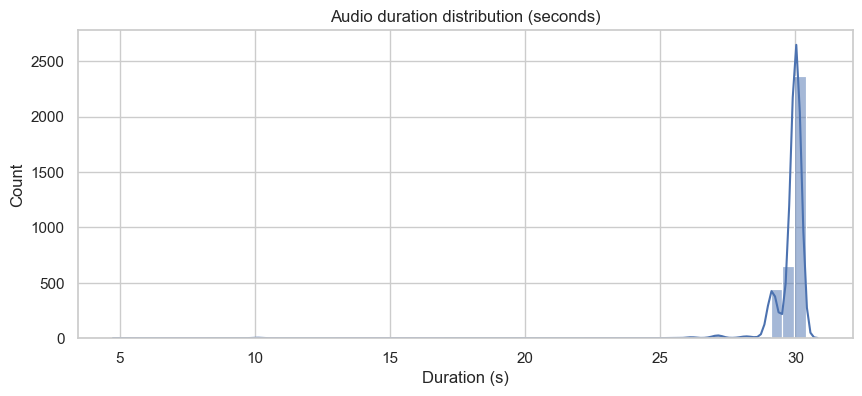

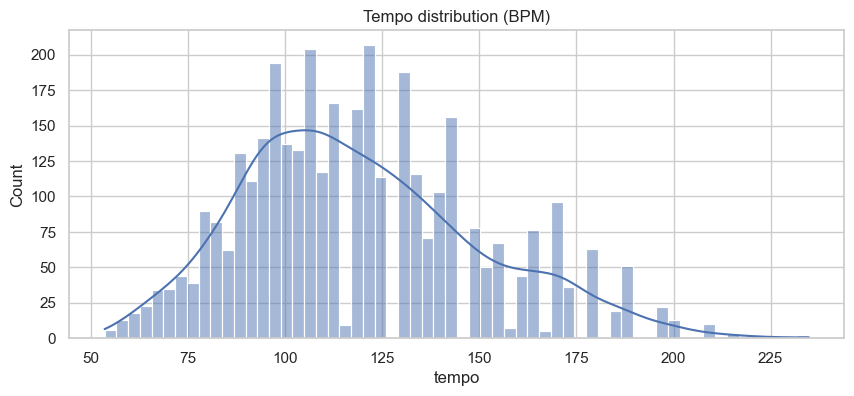

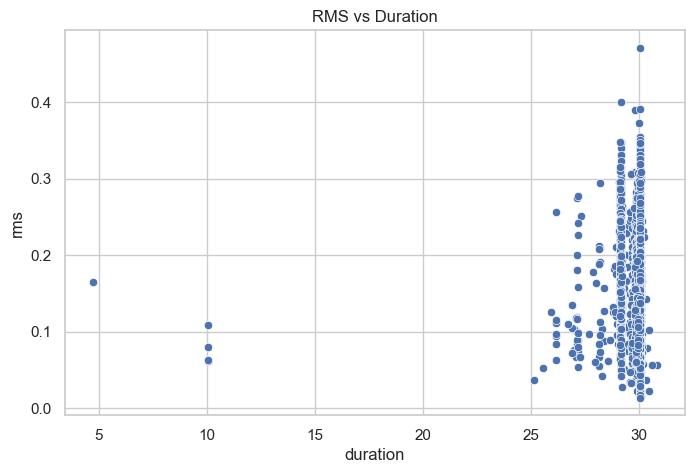

In [41]:
# Quick audio metadata summary and plots
display(audio_df.describe(include='all'))

# Duration distribution
plt.figure(figsize=(10,4))
sns.histplot(audio_df['duration'].dropna(), bins=60, kde=True)
plt.title('Audio duration distribution (seconds)')
plt.xlabel('Duration (s)')
plt.savefig(results_dir / 'duration_distribution.png', bbox_inches='tight')
plt.show()

# Tempo distribution
plt.figure(figsize=(10,4))
sns.histplot(audio_df['tempo'].dropna(), bins=60, kde=True)
plt.title('Tempo distribution (BPM)')
plt.savefig(results_dir / 'tempo_distribution.png', bbox_inches='tight')
plt.show()

# RMS vs duration scatter
plt.figure(figsize=(8,5))
sns.scatterplot(data=audio_df, x='duration', y='rms')
plt.title('RMS vs Duration')
plt.savefig(results_dir / 'rms_vs_duration.png', bbox_inches='tight')
plt.show()

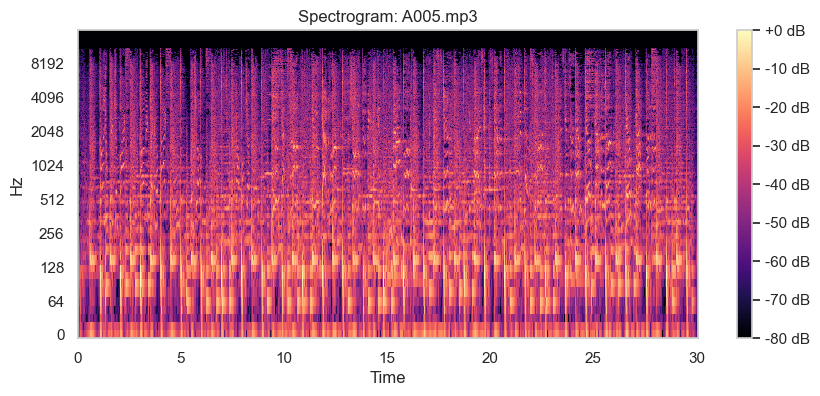

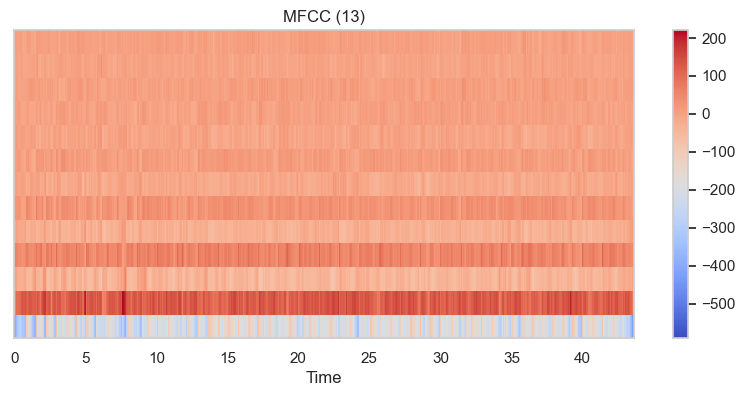

In [42]:
# Plot example spectrogram and MFCC for a short example (first non-empty audio)
example_row = audio_df.dropna(subset=['duration']).query('duration>0').iloc[0]
example_path = example_row['path']
y, sr = librosa.load(example_path, sr=None, mono=True)

# display spectrogram
plt.figure(figsize=(10,4))
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogram: {example_row['filename']}")
plt.savefig(results_dir / 'example_spectrogram.png', bbox_inches='tight')
plt.show()

# MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC (13)')
plt.savefig(results_dir / 'example_mfcc.png', bbox_inches='tight')
plt.show()

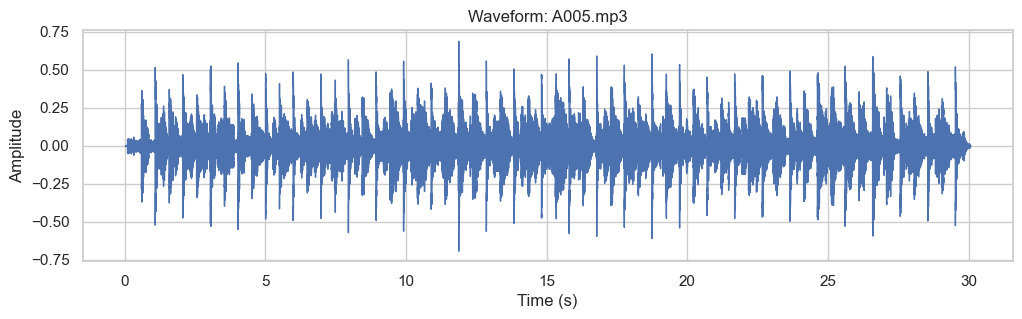

In [43]:
# Plot waveform for an example audio file 
from pathlib import Path
try:
    path = example_path
except NameError:
    example_row = audio_df.dropna(subset=['duration']).query('duration>0').iloc[0]
    path = example_row['path']

y, sr = librosa.load(path, sr=None, mono=True)
plt.figure(figsize=(12,3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform: {Path(path).name}")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig(results_dir / 'example_waveform.png', bbox_inches='tight')
plt.show()

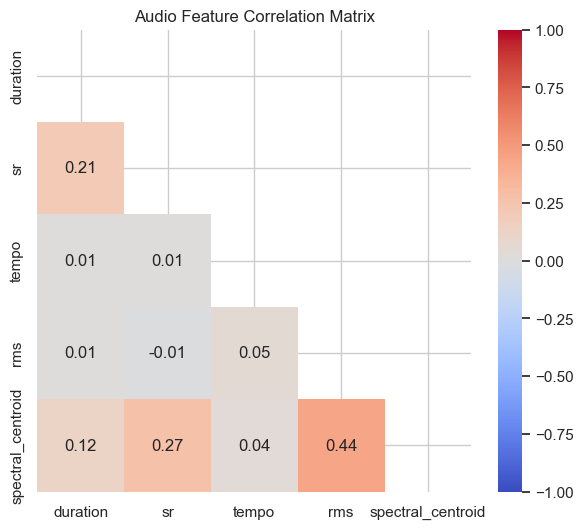

In [44]:
# Compute correlation between numeric audio features and plot heatmap
features = ['duration','sr','tempo','rms','spectral_centroid']
# keep only available features
available = [f for f in features if f in audio_df.columns]
corr_df = audio_df[available].dropna().corr()

mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=(7,6))
sns.heatmap(corr_df, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Audio Feature Correlation Matrix')
plt.savefig(results_dir / 'correlation_matrix.png', bbox_inches='tight')
plt.show()

## Lyrics EDA: Tokenization, lengths, and top words

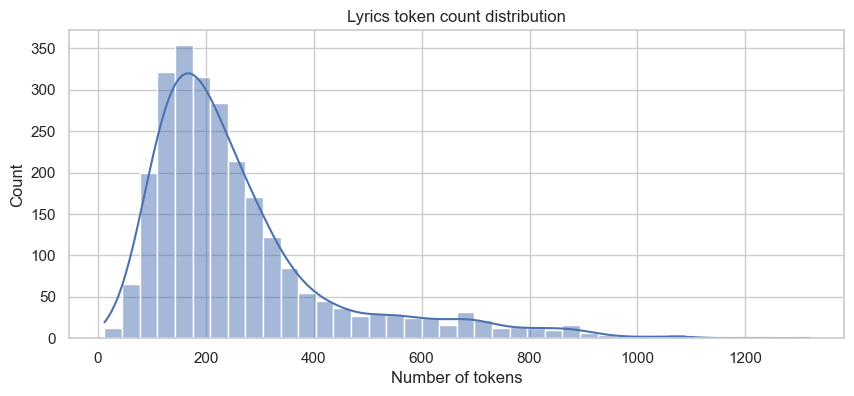

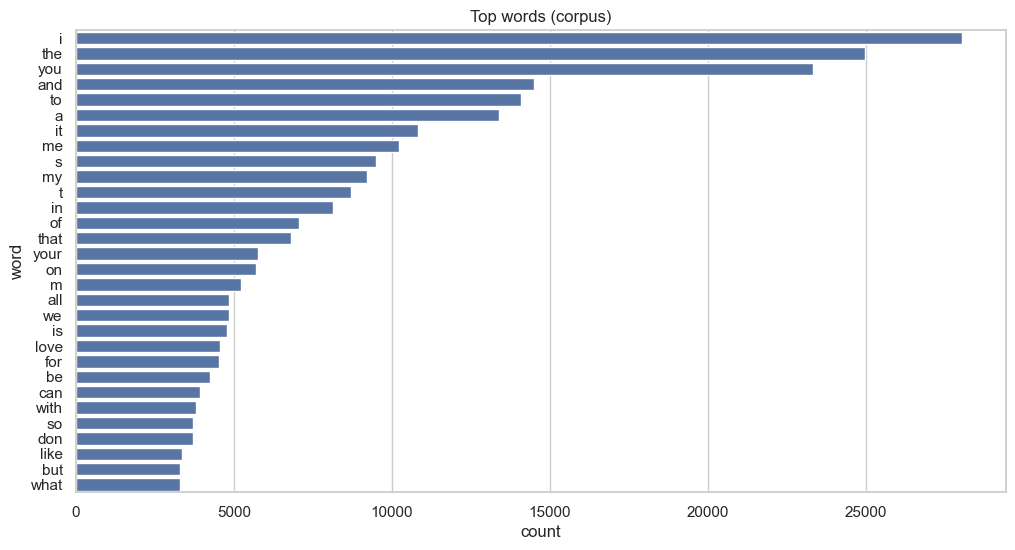

In [45]:
# Lyrics visualizations
plt.figure(figsize=(10,4))
sns.histplot(lyrics_df['tokens'].dropna(), bins=40, kde=True)
plt.title('Lyrics token count distribution')
plt.xlabel('Number of tokens')
plt.savefig(results_dir / 'lyrics_token_distribution.png', bbox_inches='tight')
plt.show()

# Top words barplot
top_df = pd.DataFrame(top_words, columns=['word','count']).head(30)
plt.figure(figsize=(12,6))
sns.barplot(data=top_df, y='word', x='count')
plt.title('Top words (corpus)')
plt.savefig(results_dir / 'top_words.png', bbox_inches='tight')
plt.show()

In [46]:
# Merge audio and lyrics metadata by filename base (best-effort)
from pathlib import Path as _Path

def stem(name):
    return _Path(name).stem.replace('.words','')

audio_df['stem'] = audio_df['filename'].apply(stem)
lyrics_df['stem'] = lyrics_df['filename'].apply(stem)
merged = audio_df.merge(lyrics_df, on='stem', how='outer', suffixes=('_audio','_lyrics'))
merged.to_csv(results_dir / 'merged_audio_lyrics.csv', index=False)
merged.head()

,filename_audio,path_audio,duration,sr,tempo,rms,spectral_centroid,stem,filename_lyrics,path_lyrics,chars,tokens
0,A001.mp3,..\data\audio\Q4\A001.mp3,30.060,32000.0,72.115385,0.085178,2134.274286,A001,NaN,NaN,NaN,NaN
1,A002.mp3,..\data\audio\Q4\A002.mp3,30.060,32000.0,133.928571,0.114273,1933.759162,A002,NaN,NaN,NaN,NaN
2,A003.mp3,..\data\audio\Q3\A003.mp3,30.024,32000.0,98.684211,0.048714,1758.145329,A003,NaN,NaN,NaN,NaN
3,A004.mp3,..\data\audio\Q3\A004.mp3,30.060,32000.0,101.351351,0.073212,1794.455731,A004,NaN,NaN,NaN,NaN
4,A005.mp3,..\data\audio\Q1\A005.mp3,30.060,32000.0,120.967742,0.061726,2726.542730,A005,NaN,NaN,NaN,NaN


# **EDA For Genres Dataset**


Value counts per column:

Column: Song
Song
L001-141        1
L002-157        1
L004-120        1
L005-84         1
L006-135        1
               ..
MT0036111757    1
MT0036368550    1
MT0037985737    1
MT0039250520    1
MT0041030749    1
Name: count, Length: 2568, dtype: int64

Column: Quadrant
Quadrant
Q2    710
Q4    637
Q3    621
Q1    600
Name: count, dtype: int64

Column: Title
Title
Silent Night                     6
The Christmas Song               4
All of Me                        3
Santa Claus Is Coming to Town    3
Jingle Bells                     3
                                ..
The Bleeding                     1
The Boy from Ipanema             1
The Enemy Inside                 1
Angel                            1
A Natural Woman                  1
Name: count, Length: 2478, dtype: int64

Column: Genres
Genres
Pop/Rock                                                                                                             625
Rap                               

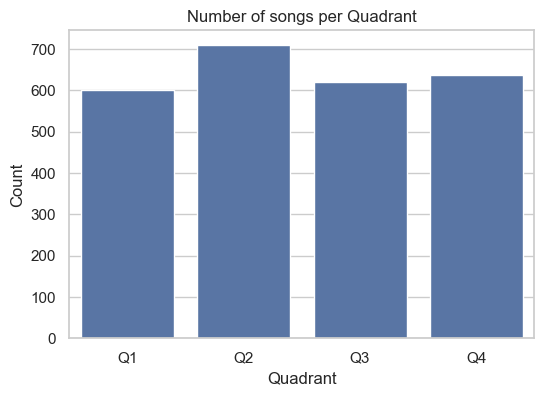

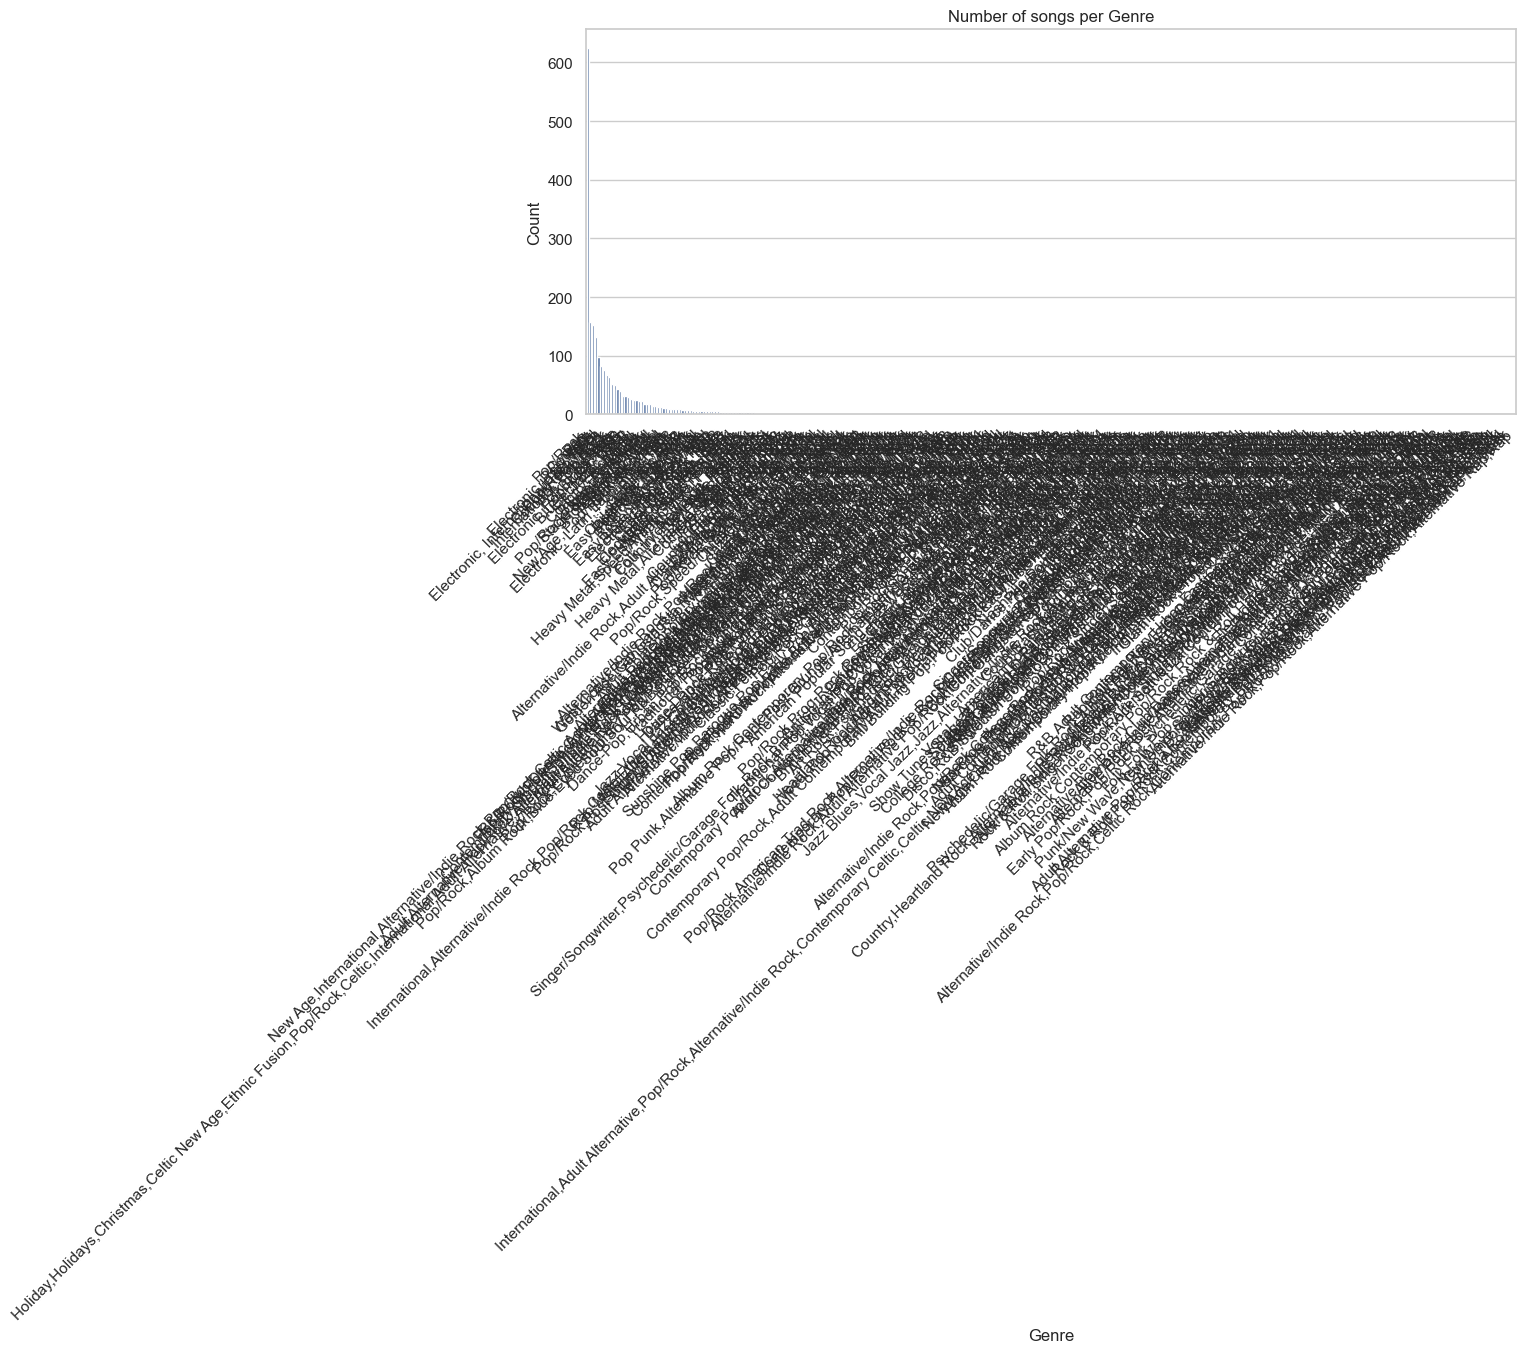


Top 10 genres by number of songs:
Genres
Pop/Rock                               625
Rap                                    158
Country                                153
Electronic, Pop/Rock                   132
R&B                                     97
Jazz, Vocal                             83
Electronic, International, Pop/Rock     76
Pop/Rock, R&B                           67
Country, Pop/Rock                       63
International, Pop/Rock                 51
Name: count, dtype: int64

Number of songs per Quadrant and Genre:


Genres,"Adult Alternative Pop/Rock,Alternative/Indie Rock,Contemporary Pop/Rock,Pop/Rock,Alternative Pop/Rock","Adult Alternative Pop/Rock,Alternative/Indie Rock,Contemporary Singer/Songwriter","Adult Alternative Pop/Rock,Alternative/Indie Rock,Lo-Fi,Indie Rock,Pop/Rock","Adult Alternative Pop/Rock,Alternative/Indie Rock,Pop/Rock,Alternative Pop/Rock,College Rock","Adult Contemporary,Contemporary R&B,R&B,Pop/Rock","Adult Contemporary,Dance-Pop,Contemporary Pop/Rock,Pop/Rock,Club/Dance","Adult Contemporary,Disco,R&B,Contemporary Pop/Rock,Pop/Rock,Soft Rock","Adult Contemporary,Quiet Storm,R&B,Urban,Soft Rock,Pop/Rock","Adult Contemporary,R&B,Contemporary Pop/Rock,Disco,Pop/Rock","Album Rock,Adult Contemporary,Pop/Rock,Soft Rock,Contemporary Pop/Rock",...,"Traditional Pop,Standards,Vocal,Vocal Jazz,Jazz","Traditional Pop,Vocal Pop,Vocal,Vocal Jazz,Jazz,Christmas,Holidays,Holiday","Uptown Soul,Pop-Soul,R&B,Soul","Urban,R&B,Dance-Pop,Pop,Pop/Rock",Vocal,"Vocal Jazz,Jazz","Vocal Jazz,Jazz,Tin Pan Alley Pop,Vocal Pop,Traditional Pop,Vocal","Vocal Pop,American Popular Song,Vocal","Vocal Pop,Traditional Pop,Vocal Jazz,Religious,Jazz,Vocal,Gospel,Spirituals","West Coast Rap,Gangsta Rap,Hardcore Rap,Golden Age,Rap"
Quadrant,,,,,,,,,,,,,,,,,,,,,
Q1,0,0,0,0,0,1,1,1,1,0,...,0,1,1,0,5,0,0,0,0,0
Q2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Q3,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,9,1,0,0,0,0
Q4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,9,0,1,1,1,0


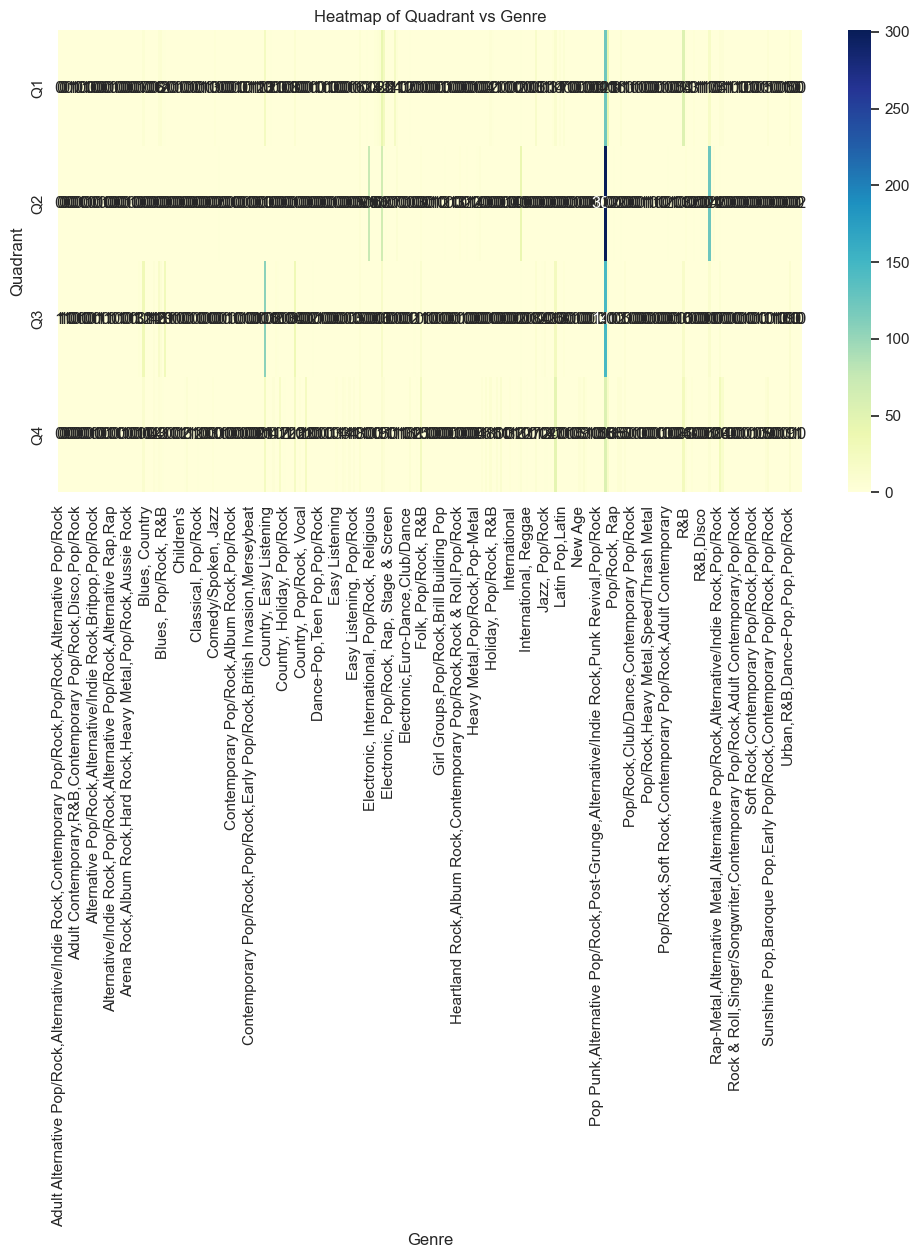

In [47]:
# EDA on genre and quadrant dataset
print("\nValue counts per column:")

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(genres_dir[col].value_counts())

sns.set(style="whitegrid")

# Distribution of quadrants
plt.figure(figsize=(6,4))
sns.countplot(x='Quadrant', data=genres_dir, order=['Q1','Q2','Q3','Q4'])
plt.title("Number of songs per Quadrant")
plt.xlabel("Quadrant")
plt.ylabel("Count")
plt.show()

# Distribution of genres
plt.figure(figsize=(12,5))
genre_order = genres_dir['Genres'].value_counts().index
sns.countplot(x='Genres', data=genres_dir, order=genre_order)
plt.title("Number of songs per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

# Top genres
top_genres = genres_dir['Genres'].value_counts().head(10)
print("\nTop 10 genres by number of songs:")
print(top_genres)

# Quadrant vs Genre cross-tab
quad_genre_ct = pd.crosstab(genres_dir['Quadrant'], genres_dir['Genres'])
print("\nNumber of songs per Quadrant and Genre:")
display(quad_genre_ct)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(quad_genre_ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Quadrant vs Genre")
plt.ylabel("Quadrant")
plt.xlabel("Genre")
plt.show()
